#  Hello Supervised Learning World!!!

## ProbandoAlgoritmo Básico Gradiente Descendente con funciones sencillas



Lineal 
$f_1(x) =  ax$

In [638]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Ejemplo Ilustrativo
Encontrar parámetros de la función lineal $f(x,\theta) = x \cdot w $ donde $\theta = \{w\}$utilizando el algoritmo de gradiente descendiente dado un conjunto de datos etiquetados.

 ## 1. Construcción del problema

In [639]:
x = [0.5,0.5]

w01 = np.random.rand(2)*10-5
w02 = np.random.rand(2)*10-5
w03 = np.random.rand(2)*10-5

print(w01)
print(w02)
print(w03)

[-4.76405882 -4.26757069]
[-0.55099957  3.58534569]
[-1.28123622  4.16796788]


In [640]:
w01_init = [-1.76,  1.78]
w02_init = [ 2.47, -4.50]
w03_init = [0.74, 0.90]


In [641]:
w01 = [7.1,5.2]
w02 = [0.86, -1.91]
w03 =[-4.11, 4.88]


In [642]:
def layer1(x,w):
    return np.dot(x,w)

def sigm(y):
    return 1/(1+np.exp(-y))

In [643]:


a = np.arange(-50,50,5)
combinations = it.product(a,a)

dataset = np.array([[0,0,1]])

for combination in combinations:
    
    #capa de entrada
    x = np.array(combination)
    
    # 2 neuronas capa intermedia 
    y_1 = sigm(np.dot(x,w01))
    y_2 = sigm(np.dot(x,w02))
    
    # 1 neurona capa de salida
    z = sigm(w03[0]*y_1+ w03[1]*y_2)
    
    #asociando x con z 
    dataset = np.append(dataset,[np.append(x, (z>0.5)*1 )],axis=0)
    


[]

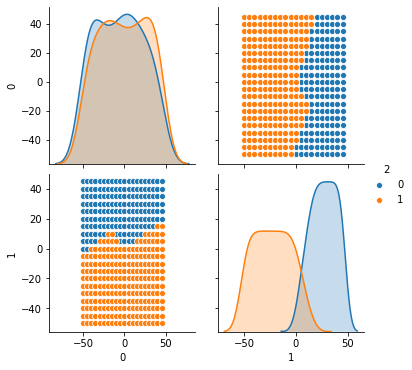

In [644]:
df = pd.DataFrame(dataset)
sns.pairplot(df, hue=2)
plt.plot()

In [645]:
y =1
yhat =0.9999
(y * np.log(yhat)+ (1-y)*np.log(1-yhat))

-0.00010000500033334732

In [646]:
def L(yhat,y):
    return (y * np.log(yhat)+ (1-y)*np.log(1-yhat))

def derivative_L(yhat,y):
    return (yhat-y)/((yhat-1)*yhat)
    

def cost(W,dataset):

    w01,W02,W03 = (W[0],W[1],W[2])
    
    c = 0
    for d in dataset:
        x = d[:2]
        y = (d[2]>0)*1
        yhat = sigm((w03[0]*sigm(np.dot(x,w01)) + w03[1]*sigm(np.dot(x,w02))))
        c += L(yhat,y)
        
    return c
def d_cost(W,dataset):
    w01,W02,W03 = (W[0],W[1],W[2])
    
    c = 0
    for d in dataset:

        x = d[:2]
        y = (d[2]>0)*1
        yhat = sigm((w03[0]*sigm(np.dot(x,w01)) + w03[1]*sigm(np.dot(x,w02))))
        c += derivative_L(yhat,y)
    return c
    

In [647]:
W = [w01, w02, w03]
print(cost(W,dataset))
print(d_cost(W,dataset))

-96.84979404744733
90.97511888747712


In [648]:
W_init = [w01_init, w02_init , w03_init]

print(cost(W_init,dataset))
dc = d_cost(W_init,dataset)
print(dc)

-179.48618875003243
2003.1402603707224


In [656]:
w01_init = [-1.76,  1.78]
w02_init = [ 2.47, -4.50]
w03_init = [0.74, 0.90]

W_t = (w01_init,w02_init,w03_init)
W_t


([-1.76, 1.78], [2.47, -4.5], [0.74, 0.9])

In [657]:
eta = 0.001

# modelo
y_1 = sigm(np.dot(x,w01_init))
y_2 = sigm(np.dot(x,w02_init))
z = sigm(w03_init[0]*y_1+ w03_init[1]*y_2)

In [658]:
dc =  d_cost([w01_init,w02_init,w03_init],dataset)
dc

2003.1402603707224

In [652]:
#inicializamos parámetros
delta_w03 = w03
delta_w02 = w02
delta_w01 = w01

In [660]:
delta_w03[0] = dc*sigm(z)*(1*sigm(z))*y_1
delta_w03[1] = dc*sigm(z)*(1*sigm(z))*y_2

delta_w01[0] = delta_w03[0]*sigm(y_1)*(1-y_1)*1
delta_w01[1] = delta_w03[0]*sigm(y_1)*(1-y_1)*1

delta_w02[0] = delta_w03[0]*sigm(y_2)*(1-y_2)*1
delta_w02[1] = delta_w03[0]*sigm(y_2)*(1-y_2)*1

In [661]:
w03_init = w03_init -np.array(delta_w03)*eta
w02_init = w02_init -np.array(delta_w02)*eta
w01_init = w01_init -np.array(delta_w01)*eta



In [662]:
wl = [list(w01_init),list(w02_init),list(w03_init)]

In [663]:
wl

[[-1.877411526452702, 1.662588473547298],
 [2.1671438554839373, -4.802856144516063],
 [0.13428771096787406, 0.9]]

In [667]:
print(cost(wl,dataset[:6]))
#dc = d_cost(W_init,dataset)
#print(dc)

nan


/Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [668]:
dataset[:6]

array([[  0,   0,   1],
       [-50, -50,   1],
       [-50, -45,   1],
       [-50, -40,   1],
       [-50, -35,   1],
       [-50, -30,   1]])

## 2. Definir un modelo de regresión

$$y = f(x,\theta) $$ 
$$ f(x,\theta)  = w \cdot x $$, donde $\theta =\{w\}$

## 3. Definir la función de costo $C$
Definimos la función de la suma de las diferencias al cuadrado dividida entre 2 como la función de costo. 

$C(\theta) = \frac{1}{2} \sum_{i=1}^m (y_i-w \cdot x_i)^2 $

## 3.1 Formular la función objetivo 

$$ \underset{\theta}{\text{minimize}} \text{ } C(\theta)$$

## 4 Seleccionar algoritmo que minimice la función de objetivo. 

Gradiente descendente

### 4.1 Calculamos la derivada para el algoritmo

$\frac{\delta C(\theta) }{\delta \theta} = - \sum_{i=1}^m (y_i-w \cdot x_i) x_i$

### Gradiente Descendente



Inicializar parámetros:

0.5048402755568879

In [4]:
#Inicializar parámetros
w = 0

#lista del valor de la pendiente w a lo largo de las iteraciones
pendientes = list([w])

#tamaño de paso: tasa de aprendizaje (learning rate)
eta = 0.01

#repetir varias veces hasta cierto numero de iteraciones
for it in np.arange(10000):
    
    #calcular derivada parcial
    #inicializar derivada parcial
    grad = 0
    
    #por cada tupla del conjunto de datos (x_I,y_i) hacer
    for i in np.arange(len(x)):
        dif = -0.5*(y_noise[i]-w*x[i])*x[i]
        grad += dif
    
    #actualizar parametro w
    w = w - eta*grad
    pendientes.append(w)

print("Estimación")
print("w =",pendientes[-1])
print("Real")
print("w =",w_r)

Estimación
w = 3.3459449506074534
Real
w = 4


# Gráfica de Convergencia 

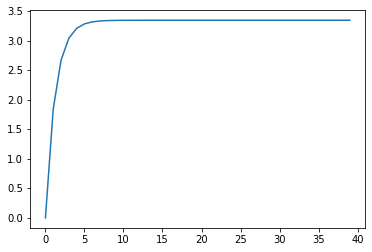

In [5]:
plt.plot(pendientes[:40])
plt.show()

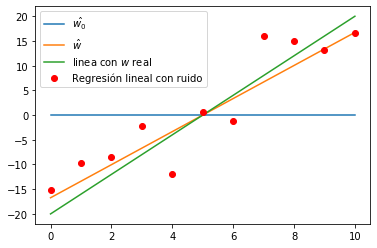

In [6]:
linea1 = pendientes[0]*x
linea2 = pendientes[-1]*x
linea3 = w_r*x

plot1, = plt.plot(linea1, label='\hat{w}')
plot2, = plt.plot(linea2, label='Line 1')
plot3, = plt.plot(linea3, label='linea real con w')
plot4, = plt.plot(y_noise,'ro', label='Regresión lineal con ruido')
plt.legend([plot1, plot2, plot3,plot4], ['$\hat{w_0}$', '$\hat{w}$','linea con $w$ real ',"Regresión lineal con ruido"])
plt.plot()

#plt.plot(y_noise,'ro')
plt.show()